# **UniSolar**

**Total Solar Energy Generation Per Campus**

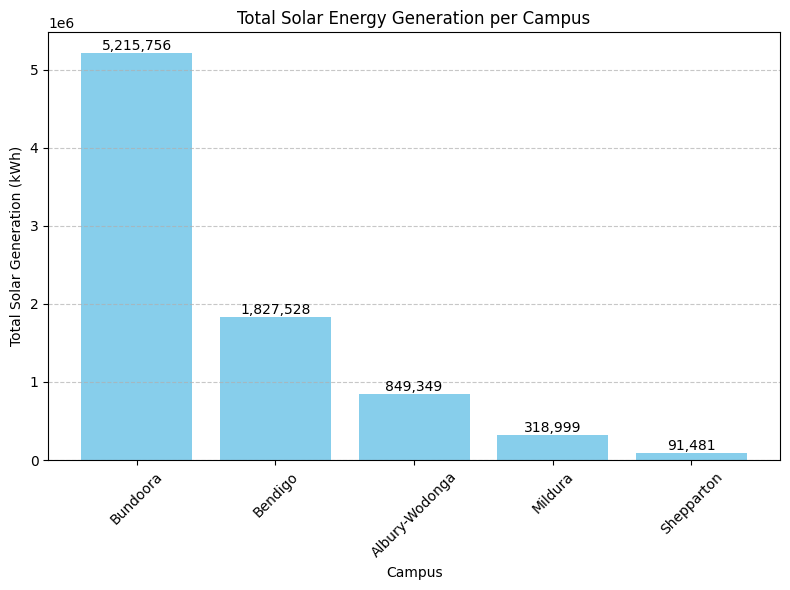

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV or data file you generated
df = pd.read_csv("graph1.csv")  # Replace with your actual filename

# Map campuskey to campus names
campus_names = {
    1: "Bundoora",
    2: "Albury-Wodonga",
    3: "Bendigo",
    4: "Mildura",
    5: "Shepparton"
}

# Add a new column with campus names
df["campus_name"] = df["campuskey"].map(campus_names)

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(df["campus_name"], df["total_solar_generation"], color='skyblue')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.title("Total Solar Energy Generation per Campus")
plt.xlabel("Campus")
plt.ylabel("Total Solar Generation (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Monthly Solar Energy Generation per Campus**

<Figure size 1200x600 with 0 Axes>

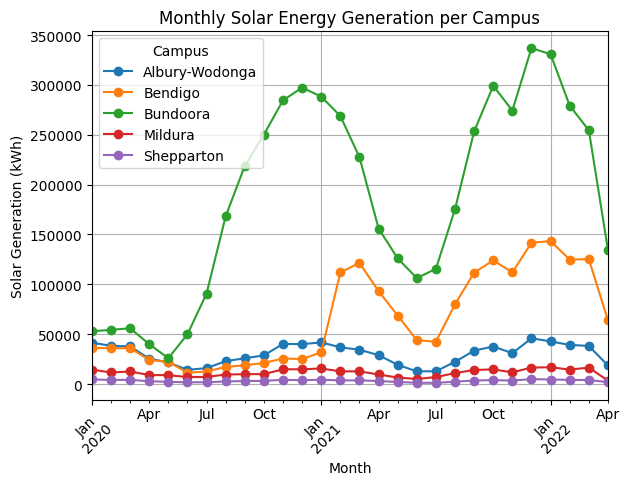

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the query result
df = pd.read_csv("graph2.csv")  # Replace with your actual filename

# Convert timestamp to datetime if it's not already
df["month"] = pd.to_datetime(df["month"])

# Map campuskey to campus names
campus_names = {
    1: "Bundoora",
    2: "Albury-Wodonga",
    3: "Bendigo",
    4: "Mildura",
    5: "Shepparton"
}
df["campus_name"] = df["campuskey"].map(campus_names)

# Pivot for time series plotting
pivot_df = df.pivot(index="month", columns="campus_name", values="monthly_generation")

# Plotting
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o')
plt.title("Monthly Solar Energy Generation per Campus")
plt.xlabel("Month")
plt.ylabel("Solar Generation (kWh)")
plt.legend(title="Campus", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


**HEATMAP (using scatter plot)**

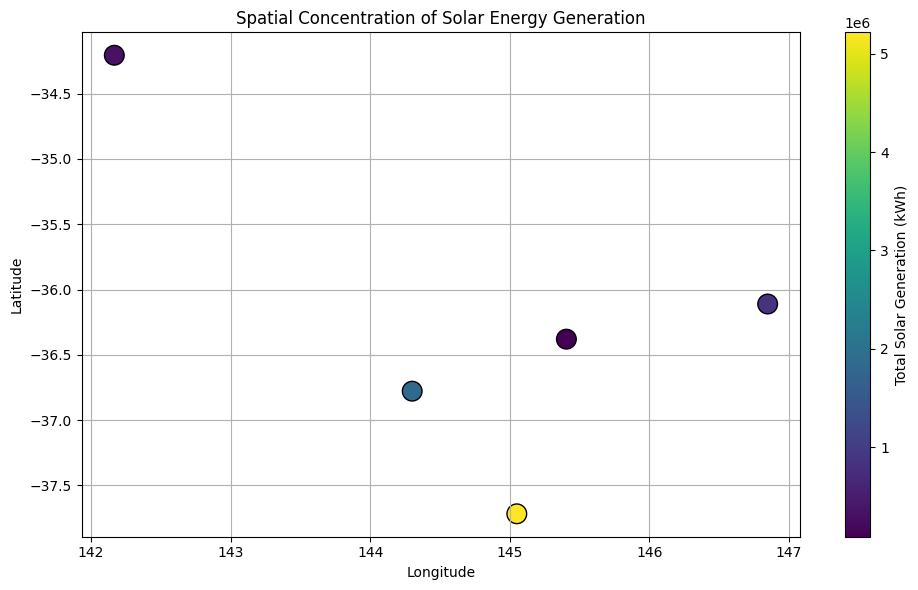

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("heatmap&bubbleplot.csv", parse_dates=['month'])

# Aggregate total generation per location
agg = df.groupby(['latitude', 'longitude'], as_index=False)['total_generation_kwh'].sum()

# Plot heatmap using scatter with color intensity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    agg['longitude'], agg['latitude'],
    c=agg['total_generation_kwh'], cmap='viridis', s=200, edgecolors='black'
)
plt.colorbar(scatter, label='Total Solar Generation (kWh)')
plt.title("Spatial Concentration of Solar Energy Generation")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


**Clustered by Campus**

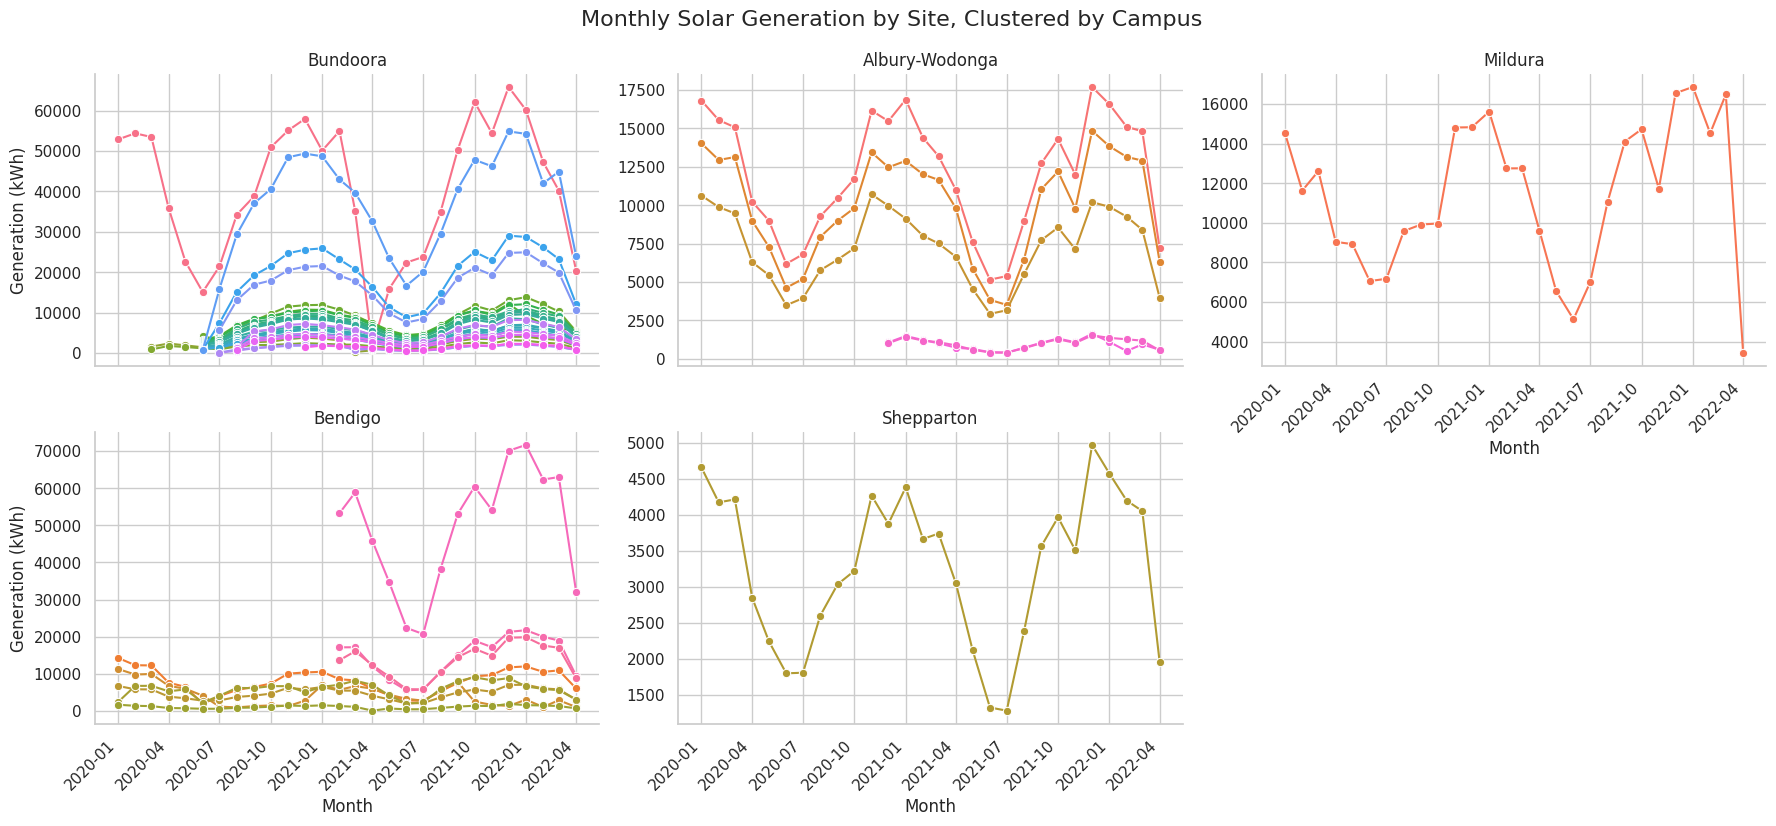

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("heatmap&bubbleplot.csv", parse_dates=['month'])

# Optional: Replace campus keys with names
campus_map = {
    1: 'Bundoora',
    2: 'Albury-Wodonga',
    3: 'Bendigo',
    4: 'Mildura',
    5: 'Shepparton'
}
df['campus'] = df['campuskey'].map(campus_map)

# Create a site label
df['site'] = 'Site ' + df['sitekey'].astype(str)

# Set plot style
sns.set(style="whitegrid")

# Create facet grid — one plot per campus
g = sns.FacetGrid(df, col='campus', hue='site', col_wrap=3, height=4, aspect=1.5, sharey=False)

# Map the lineplot on the facet grid
g.map(sns.lineplot, 'month', 'total_generation_kwh', marker='o')

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')


# Add axis labels
g.set_axis_labels("Month", "Generation (kWh)")

# Add titles for each plot
g.set_titles("{col_name}")

# Adjust the layout to prevent overlap
plt.subplots_adjust(top=0.9)

# Set the overall title for the figure
g.fig.suptitle("Monthly Solar Generation by Site, Clustered by Campus", fontsize=16)

# Show the plot
plt.show()


**Efficiency and Weather Correlation**

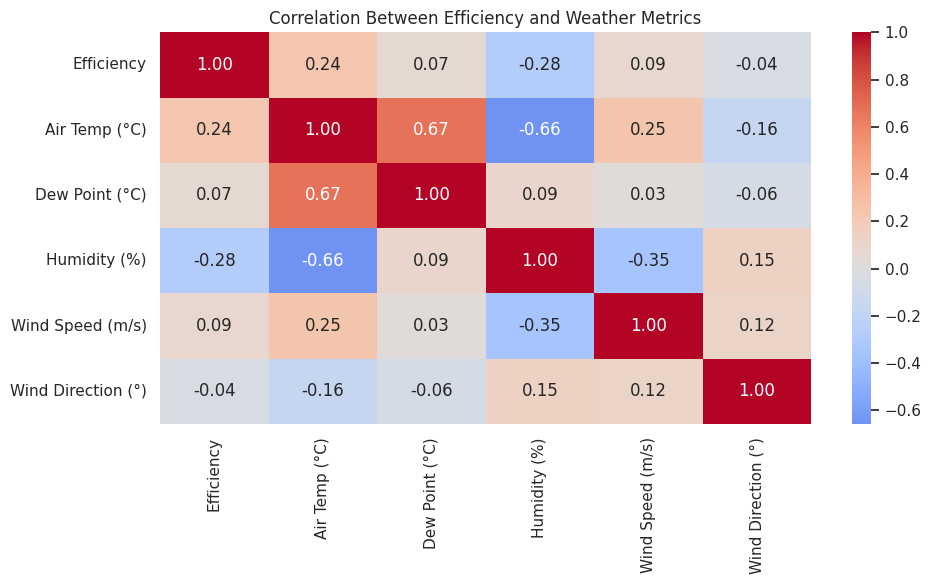

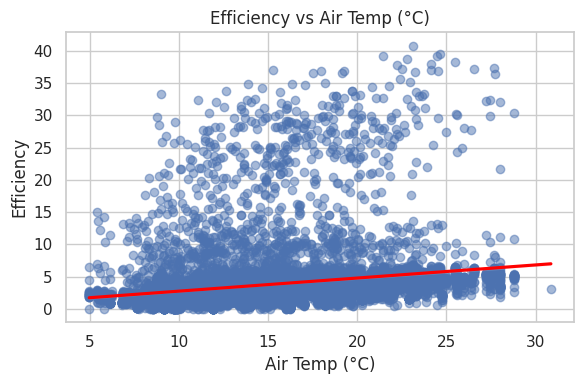

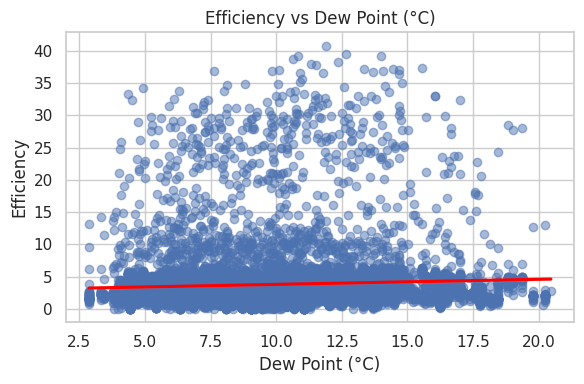

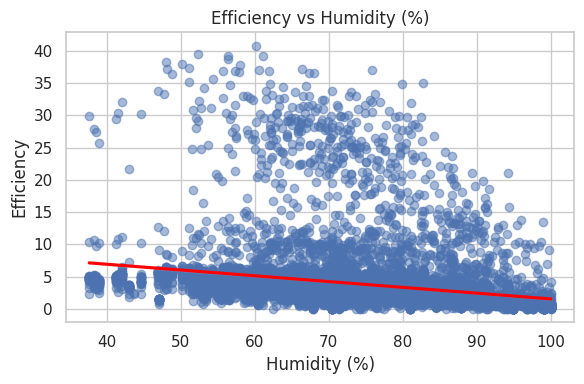

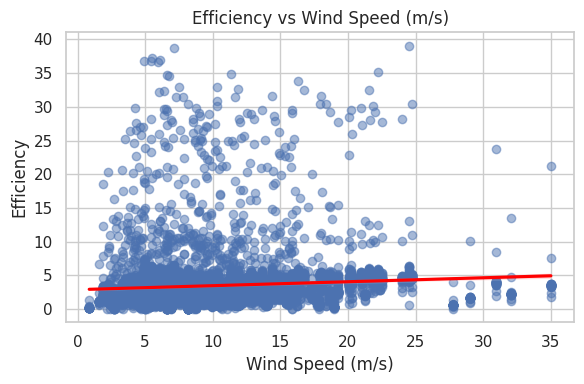

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from your SQL query output
df = pd.read_csv("efficiency and weather correlation.csv", parse_dates=['date'])

# Optional: Rename columns for better plot labels
df.rename(columns={
    'efficiency_ratio': 'Efficiency',
    'avg_air_temp': 'Air Temp (°C)',
    'avg_dew_point': 'Dew Point (°C)',
    'avg_humidity': 'Humidity (%)',
    'avg_wind_speed': 'Wind Speed (m/s)',
    'avg_wind_direction': 'Wind Direction (°)'
}, inplace=True)

# Compute correlation matrix for efficiency and weather
corr_df = df[[
    'Efficiency',
    'Air Temp (°C)',
    'Dew Point (°C)',
    'Humidity (%)',
    'Wind Speed (m/s)',
    'Wind Direction (°)'
]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Between Efficiency and Weather Metrics')
plt.tight_layout()
plt.show()

# Optional: Scatter plots with regression lines
weather_vars = ['Air Temp (°C)', 'Dew Point (°C)', 'Humidity (%)', 'Wind Speed (m/s)']

sns.set(style="whitegrid")
for var in weather_vars:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=df, x=var, y='Efficiency', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Efficiency vs {var}')
    plt.tight_layout()
    plt.show()
